<a href="https://colab.research.google.com/github/manasik29/Text-Mining/blob/main/Text_Mining_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)


**Load data**

In [1]:
import pandas as pd
data = pd.read_csv("/content/Elon_musk.csv",encoding = "ISO-8859-1")
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [2]:
data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Data Cleaning**

In [4]:
#Remove the Unnamed: 0 column
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [6]:
#Remove all types of punctuations
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]@', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
data['Text'] = data.Text.apply(clean)
data.Text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [8]:
#Word frequency
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [9]:
#import stopwords given in data
stop=pd.read_csv("/content/stop.txt",error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
stop

,x
0,a
1,a's
2,able
3,about
4,above
...,...
566,yours
567,yourself
568,yourselves
569,z


In [11]:
#clean stop words data
stop = [x.strip() for x in stop.x] # remove both the leading and the trailing characters
stop = [x for x in stop if x] # removes empty strings, because they are considered in Python as False
stop[0:10]

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after']

In [12]:
#removing stopwords
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
data

,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextlevel
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1994,flcnhvy true sounds surreal negative propagand...
1995,ppathole make read ur terms amp conditions cli...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber


In [14]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
nasaspaceflight     55
haha                55
good                51
launch              49
yeah                41
cleantechnica       40
kristennetten       35
true                35
dtype: int64

In [15]:
# Count vectorizer also tells us the frequency and occurences of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

                term  occurrences  frequency
3432          spacex          246   0.021247
136              amp          218   0.018829
3702           tesla          167   0.014424
1156  erdayastronaut          142   0.012265
3160              rt          127   0.010969


In [19]:
word_freq_df[5:15]

,term,occurrences,frequency
5,absolute,1,0.000086
6,absolutely,15,0.001296
7,absorb,1,0.000086
8,absorption,1,0.000086
9,absurd,2,0.000173
10,absurdly,1,0.000086
11,ac,1,0.000086
12,academia,1,0.000086
13,accel,1,0.000086
14,accelera,1,0.000086


Text(0.5, 1.07, 'Most frequently used words by elon in tweets')

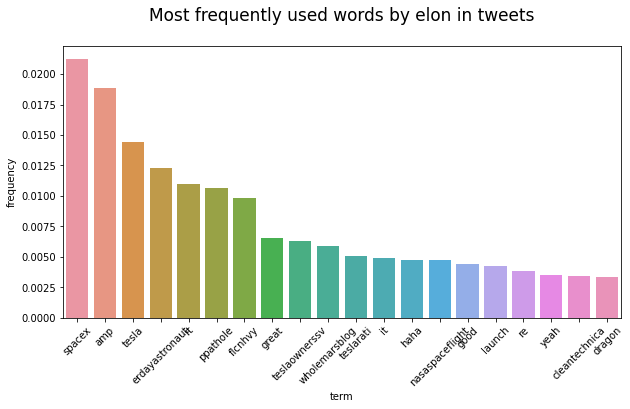

In [45]:
import seaborn as sns
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20:])
plot.set_xticklabels(rotation=45,labels = word_freq_df.sort_values('frequency', ascending=False).term)
plt.title("Most frequently used words by elon in tweets", y = 1.07, fontsize = 17)

**TF-IDF**

In [58]:
#TFIDF - Term frequency inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
df.head(10)

,abort,absolutely,access,accurate,actual,adamklotz,add,adding,advanced,ago,...,xiangaw,ya,yahoofinance,yeah,year,years,yesterday,yourfavgas,yup,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.611963,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


**Ngrams**

In [25]:
#frequency of of words occuring once, twice or thrice
def get_top_one_to_three_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,3),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [32]:
top_one_to_three_words = get_top_one_to_three_words(data["Text"], n=200) #top 200
top_one_to_three_words = pd.DataFrame(top_one_to_three_words)
top_one_to_three_words.columns=["N-gram", "Freq"]
top_one_to_three_words.head()

,N-gram,Freq
0,spacex,246
1,amp,218
2,tesla,167
3,erdayastronaut,142
4,rt,127


In [33]:
top_one_to_three_words.tail(10)

,N-gram,Freq
190,dojo,9
191,erdayastronaut flcnhvy,9
192,legs,9
193,futurejurvetson,9
194,fairing,9
195,slashdot,9
196,pcr,9
197,michaelminalab,9
198,body,9
199,ll,9


Text(0.5, 1.05, 'Most used word in tweets by elon')

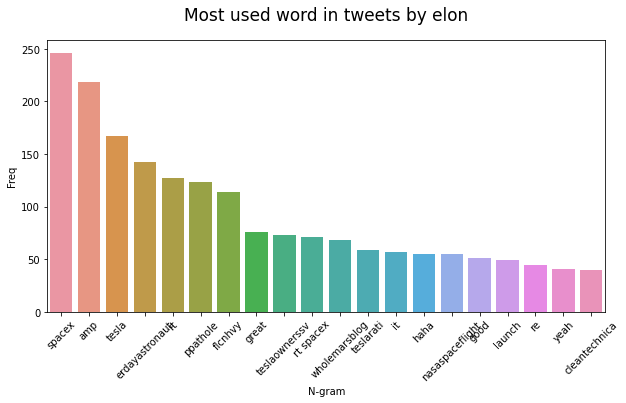

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top_one_to_three_words.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["N-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["N-gram"])
plt.title("Most used word in tweets by elon", y=1.05, fontsize=17)

In [29]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [30]:
top2_words = get_top_n2_words(data["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13


Text(0.5, 1.05, 'Most two words used together in tweets by elon')

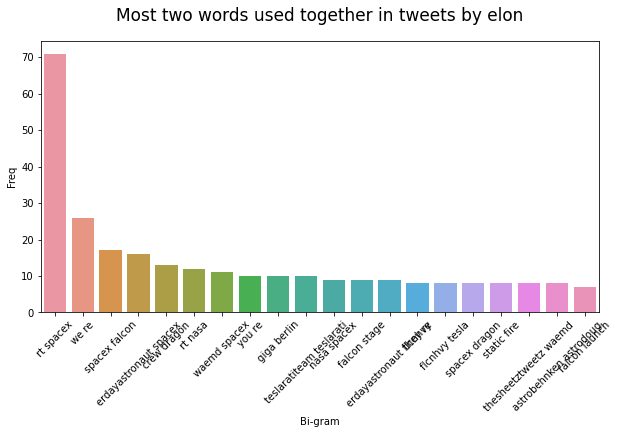

In [38]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.title("Most two words used together in tweets by elon", y=1.05, fontsize=17)

In [39]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [40]:
top3_words = get_top_n3_words(data["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [41]:
top3_df

,Tri-gram,Freq
0,rt spacex falcon,17
1,spacex falcon stage,8
2,thesheetztweetz waemd spacex,8
3,ppathole thesheetztweetz waemd,7
4,waemd spacex spacexstarlink,7
...,...,...
195,worst person ve,2
196,ppathole icannotenough flcnhvy,2
197,rt jimbridenstine news,2
198,torybruno ulalaunch spacex,2


Text(0.5, 1.05, 'Most three words used together in tweets by elon')

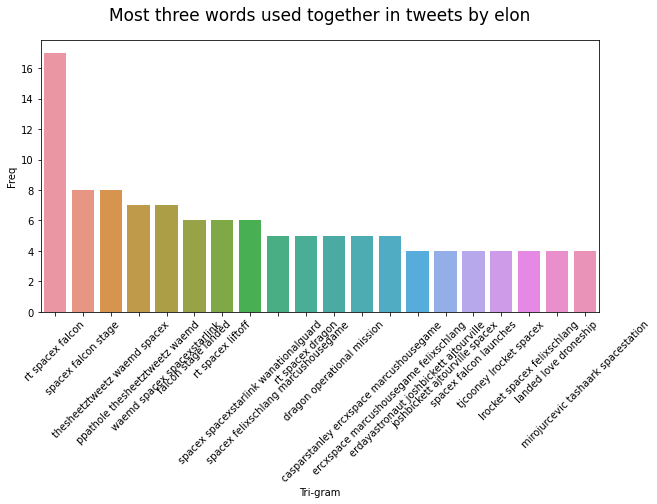

In [42]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.title("Most three words used together in tweets by elon", y=1.05, fontsize=17)

In [46]:
string_Total = " ".join(data["Text"])

Text(0.5, 1.07, "Wordcloud of the words used in elon's tweets")

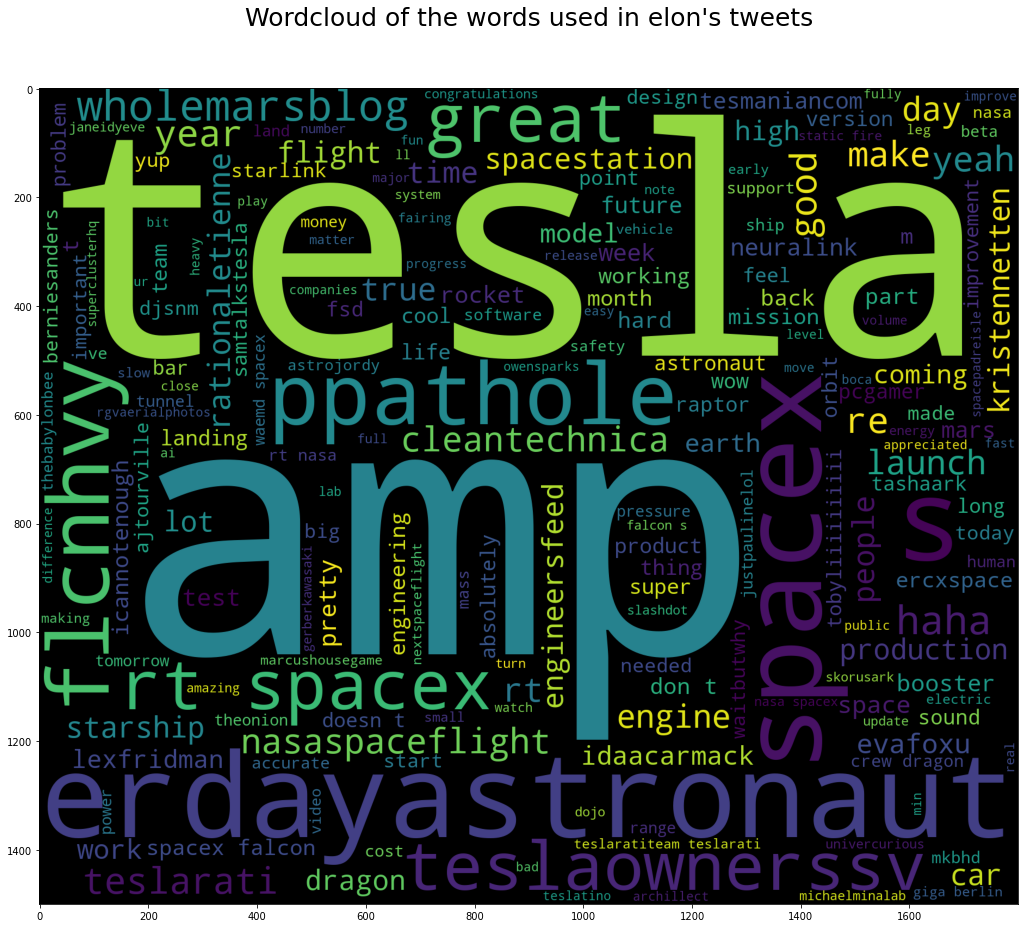

In [49]:
#wordcloud for entire corpus
fig = plt.figure(figsize = (20,15))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the words used in elon's tweets", y=1.07, fontsize=25)